<a href="https://colab.research.google.com/github/ahmedhassan97/pretrained_model-in-keras-for-image-classification/blob/master/pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this kernel we will learn how to use pre-trained models trained on

 large datasets like ILSVRC, and also learn how to use them for a 

 different task than it was trained on. We will be covering the 
 
 all of this pretrained model :

Image classification using different pre-trained models

Training a classifier for a different task, using the features 

extracted using the above-mentioned models – This is also referred to

 Transfer Learning.

Training a classifier for a different task, by modifying the weights 

of the above models – This is called Fine-tuning.** ***bold text***

In [0]:
# import lipraries which we use it in this kernel
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# create object from this pretrained model
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')


17227776/17225924 [==============================] - 1s 0us/step


PIL image size (224, 224)


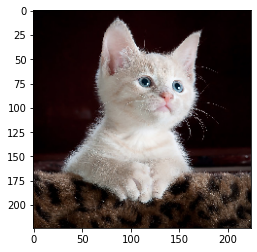

PIL image size (224, 224)


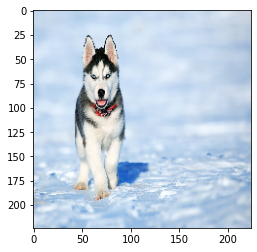

In [10]:
# import pictures which you want to predict
filename = 'cat1.jpeg'
filename2 = 'dog.jpeg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
origina2 = load_img(filename2, target_size=(224, 224))

print('PIL image size',original.size)

plt.imshow(original)
plt.show()

print('PIL image size',origina2.size)

plt.imshow(origina2)
plt.show()

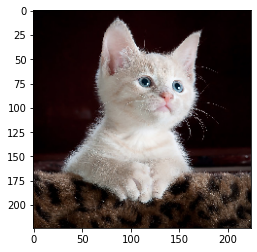

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


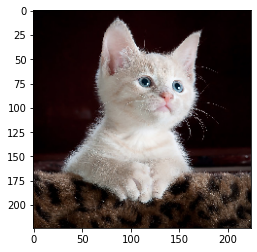

In [15]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
cat = np.expand_dims(numpy_image, axis=0)
print('image batch size', cat.shape)
plt.imshow(np.uint16(cat[0]))

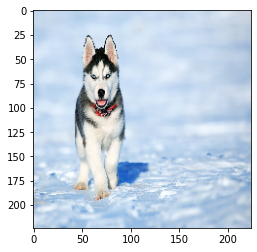

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


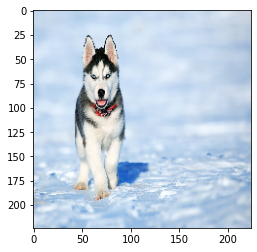

In [16]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(origina2)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
dog = np.expand_dims(numpy_image, axis=0)
print('image batch size', dog.shape)
plt.imshow(np.uint16(dog[0]))

** first model is VGG16 **

In [17]:
# prepare the image for the VGG model

processed_image = vgg16.preprocess_input(dog.copy())
print(processed_image.shape)
# get the predicted probabilities for each class


predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label[0][0])
print (label[0][1])
print (label[0][2])

(1, 224, 224, 3)
('n02109961', 'Eskimo_dog', 0.60306567)
('n02110185', 'Siberian_husky', 0.36525077)
('n03218198', 'dogsled', 0.023197219)


In [18]:
#  predict cat picture 
# prepare the image for the VGG model

processed_image = vgg16.preprocess_input(cat.copy())
print(processed_image.shape)
# get the predicted probabilities for each class


predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label[0][0])
print (label[0][1])
print (label[0][2])

(1, 224, 224, 3)
('n02124075', 'Egyptian_cat', 0.38546142)
('n02123045', 'tabby', 0.33655638)
('n02127052', 'lynx', 0.10174599)


In [19]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

******* second model is  InceptionV3 Pre-Trained Model ******

The InceptionV3 is the third iteration of the inception architecture,

 first developed for the GoogLeNet model.

This model was developed by researchers at Google and described in the 

2015 paper titled “Rethinking the Inception Architecture for Computer 

Vision.”

The model expects color images to have the square shape 299×299.

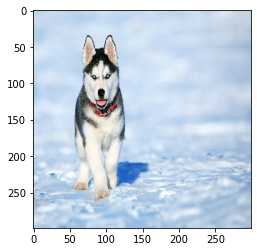

In [23]:
# modify picture to new size 
# import pictures which you want to predict
filename = 'cat1.jpeg'
filename2 = 'dog.jpeg'
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))
origina2 = load_img(filename2, target_size=(299, 299))
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image1 = img_to_array(original)
numpy_image2 = img_to_array(origina2)
cat = np.expand_dims(numpy_image1, axis=0)
dog = np.expand_dims(numpy_image2, axis=0)

plt.imshow(np.uint8(cat[0]))
plt.imshow(np.uint8(dog[0]))





In [25]:
#  predict cat picture 
# prepare the image for the VGG model

processed_image = inception_v3.preprocess_input(cat.copy())
print(processed_image.shape)
# get the predicted probabilities for each class


predictions = inception_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label[0][0])
print (label[0][1])
print (label[0][2])
inception_model.summary()

(1, 299, 299, 3)
('n02123394', 'Persian_cat', 0.5572939)
('n02124075', 'Egyptian_cat', 0.06946706)
('n02123045', 'tabby', 0.058852565)
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32

***  Load the ResNet50 Pre-trained Model ***

The Residual Network, or ResNet for short, is a model that makes use 

of the residual module involving shortcut connections.

It was developed by researchers at Microsoft and described in the 2015 

paper titled “Deep Residual Learning for Image Recognition.”

The model expects color images to have the square shape 224×224.

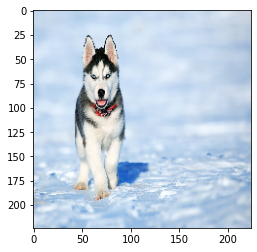

In [27]:
# modify picture to new size 
# import pictures which you want to predict
filename = 'cat1.jpeg'
filename2 = 'dog.jpeg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
origina2 = load_img(filename2, target_size=(224, 224))
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image1 = img_to_array(original)
numpy_image2 = img_to_array(origina2)
cat = np.expand_dims(numpy_image1, axis=0)
dog = np.expand_dims(numpy_image2, axis=0)

plt.imshow(np.uint8(cat[0]))
plt.imshow(np.uint8(dog[0]))


In [28]:
#  predict cat picture 
# prepare the image for the VGG model

processed_image = resnet50.preprocess_input(cat.copy())
print(processed_image.shape)
# get the predicted probabilities for each class


predictions = resnet_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label[0][0])
print (label[0][1])
print (label[0][2])
inception_model.summary()

(1, 224, 224, 3)
('n02124075', 'Egyptian_cat', 0.4983201)
('n02123045', 'tabby', 0.15211056)
('n02123394', 'Persian_cat', 0.08468674)
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32)